### Name
### StudentId

# Librarires

In [12]:
import numpy as np
import random

import sklearn
from sklearn.datasets import fetch_california_housing

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

In [4]:
x_data

array([[  11.3074    ,   42.        ,    8.36336336, ...,    2.5015015 ,
          32.82      , -117.31      ],
       [   1.0714    ,   31.        ,    3.01232394, ...,    1.92253521,
          33.77      , -118.19      ],
       [   3.375     ,   35.        ,    4.96747967, ...,    6.07804878,
          34.01      , -117.92      ],
       ...,
       [   4.4769    ,   16.        ,    5.86554622, ...,    3.05882353,
          38.87      , -121.27      ],
       [   8.468     ,   39.        ,    6.08157895, ...,    2.74736842,
          33.9       , -118.41      ],
       [   2.6944    ,   19.        ,    5.43936382, ...,    2.84691849,
          36.08      , -119.03      ]])

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [9]:
#TODO
from numpy.linalg import norm

class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def initializ_centroids(self, X):
        np.random.RandomState(42)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

# Use elbow method and silhouette method to choose optimal cluster numbers

In [34]:
#TODO
import matplotlib.pyplot as plt

def elbow(X, max_clusters=10):
    sse = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        sse.append(kmeans.error)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), sse, marker='o', color='b')
    plt.xlabel('# clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.show()

def silhouette(X, max_clusters=10):
    scores1 = []
    for i in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        score = sklearn.metrics.silhouette_score(X, kmeans.predict(X))
        scores1.append(score)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters+1), scores1, marker='o', color='b')
    plt.xlabel('# clusters')
    plt.ylabel('score')
    plt.title('Silhouette Method')
    plt.show()

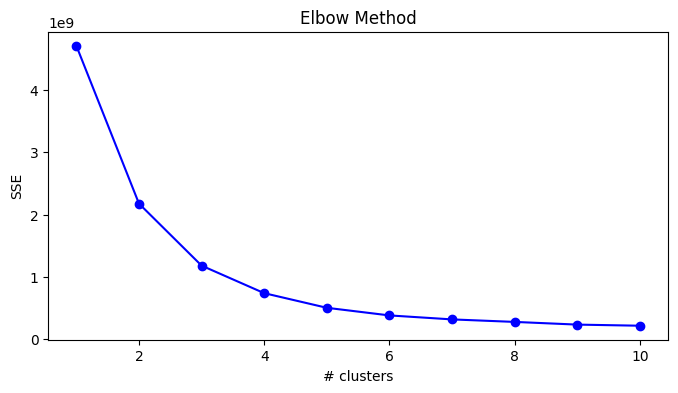

In [35]:
elbow(x_data)

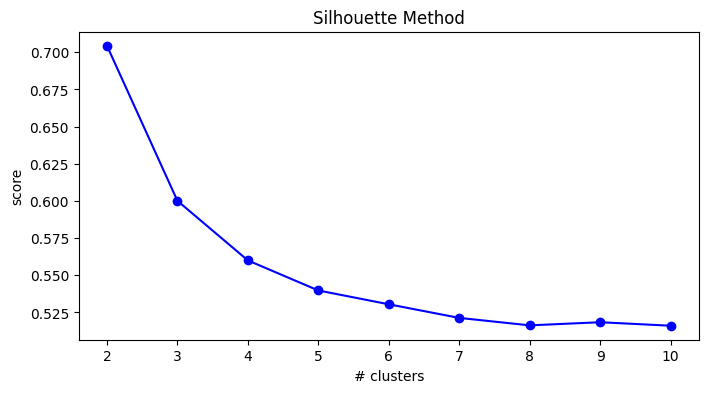

In [36]:
silhouette(x_data)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

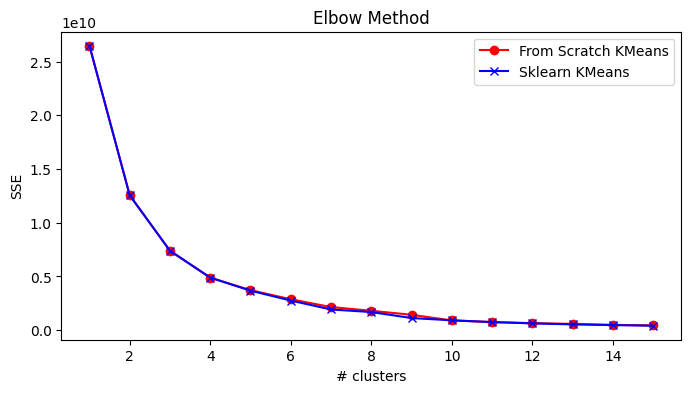

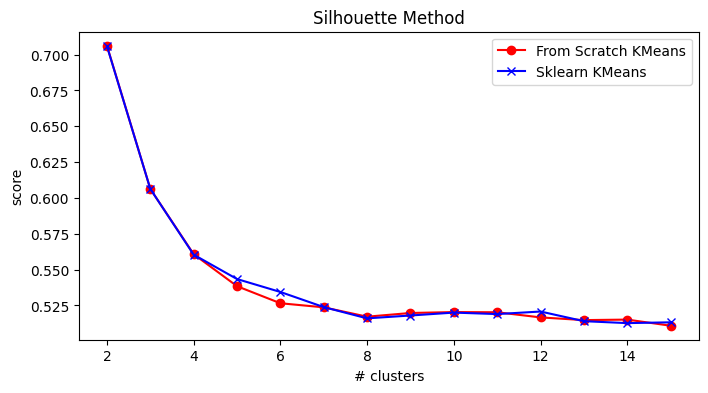

In [44]:
#TODO
from sklearn.cluster import KMeans as KMeansSK

max_clusters = 15

# elbow comparison
sse1, sse2 = [], []
for i in range(1, max_clusters+1):
    kmeans_fs = KMeans(n_clusters=i)
    kmeans_fs.fit(X)
    sse1.append(kmeans_fs.error)
    
    kmeans_sklearn = KMeansSK(n_clusters=i, max_iter=1000)
    kmeans_sklearn.fit(X)
    sse2.append(kmeans_sklearn.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters+1), sse1, marker='o', label='From Scratch KMeans', color='r')
plt.plot(range(1, max_clusters+1), sse2, marker='x', label='Sklearn KMeans', color='b')
plt.xlabel('# clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.legend()
plt.show()
    

# silhouette comparison
scores1, scores2 = [], []
for i in range(2, max_clusters+1):
    kmeans_custom = KMeans(n_clusters=i)
    kmeans_custom.fit(X)
    score_custom = sklearn.metrics.silhouette_score(X, kmeans_custom.predict(X))
    scores1.append(score_custom)
    
    kmeans_sklearn = KMeansSK(n_clusters=i, max_iter=1000)
    kmeans_sklearn.fit(X)
    score_sklearn = sklearn.metrics.silhouette_score(X, kmeans_sklearn.labels_)
    scores2.append(score_sklearn)

plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters+1), scores1, marker='o', label='From Scratch KMeans', color='r')
plt.plot(range(2, max_clusters+1), scores2, marker='x', label='Sklearn KMeans', color='b')
plt.xlabel('# clusters')
plt.ylabel('score')
plt.title('Silhouette Method')
plt.legend()
plt.show()

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

**Elbow method**       
In Elbow Method, from the comparison graph, we see that the SSE decreases sharply up to 3 clusters and then starts to level off. So the optimal number of clusters, choosing based on elbow method, appears to be around 3 clusters for both from scratch and sklearn KMeans algorithms.     

**Silhouette method**        
In Silhouette method, The optimal number of clusters k is typically the one that maximizes the average Silhouette score. The highest silhouette score is observed at 2 clusters for both algorithms. As the number of clusters increases, the score declines. This trend is consistent between the from scratch KMeans and sklearn KMeans algorithms.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method